# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.77'

### Load in the data

In [2]:
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.436888,1048.898738,0.897797
1,FI2,0.417796,1015.924767,0.831850
2,FI4,0.459045,1041.589916,0.883180
3,FI5,0.493865,1034.935183,0.869870
4,FI7,0.482227,1034.820102,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

### Lets do a silly example first just using a single FI so you can see what its doing
- If you use plot_figure=True, it will plot the resulting distributions. 

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.563201,1.562242,0.069075,5.901768,5.898147,0.260788,50,0,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.427349,1.428575,0.060596,5.388865,5.393494,0.228778,50,0,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.678069,1.677114,0.076163,6.335442,6.331840,0.287550,50,0,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.869658,1.871428,0.086176,7.058775,7.065458,0.325351,50,0,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.804192,1.802941,0.082349,6.811615,6.806890,0.310905,50,0,0.0,1307.970102,0.482227,None,2700,SW96


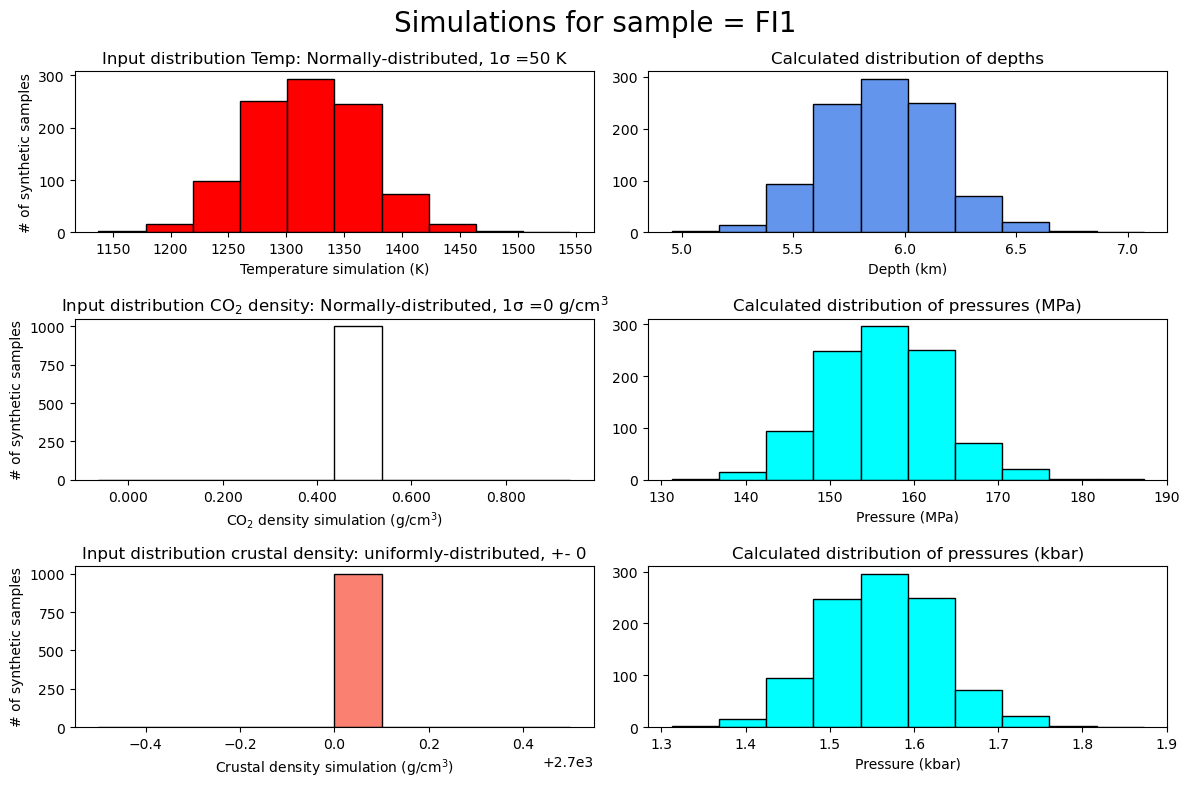

In [3]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

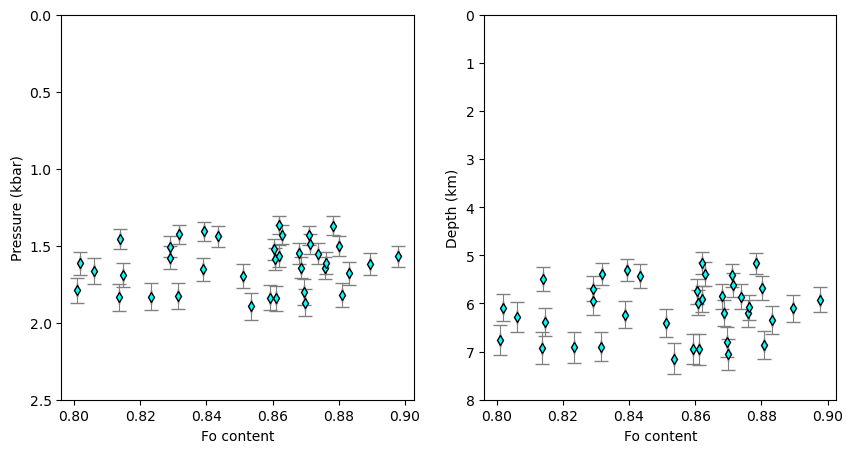

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO$_2$ Density
- Lets say the uncertainty in CO$_2$ density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.572456,1.560266,0.230981,5.936708,5.890685,0.872056,0,10,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.435475,1.427973,0.205419,5.419546,5.391224,0.775546,0,10,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.695204,1.680217,0.258736,6.400136,6.343553,0.976841,0,10,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.893529,1.868754,0.292288,7.148900,7.055364,1.103514,0,10,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.830046,1.812312,0.280101,6.909222,6.842269,1.057505,0,10,0.0,1307.970102,0.482227,None,2700,SW96


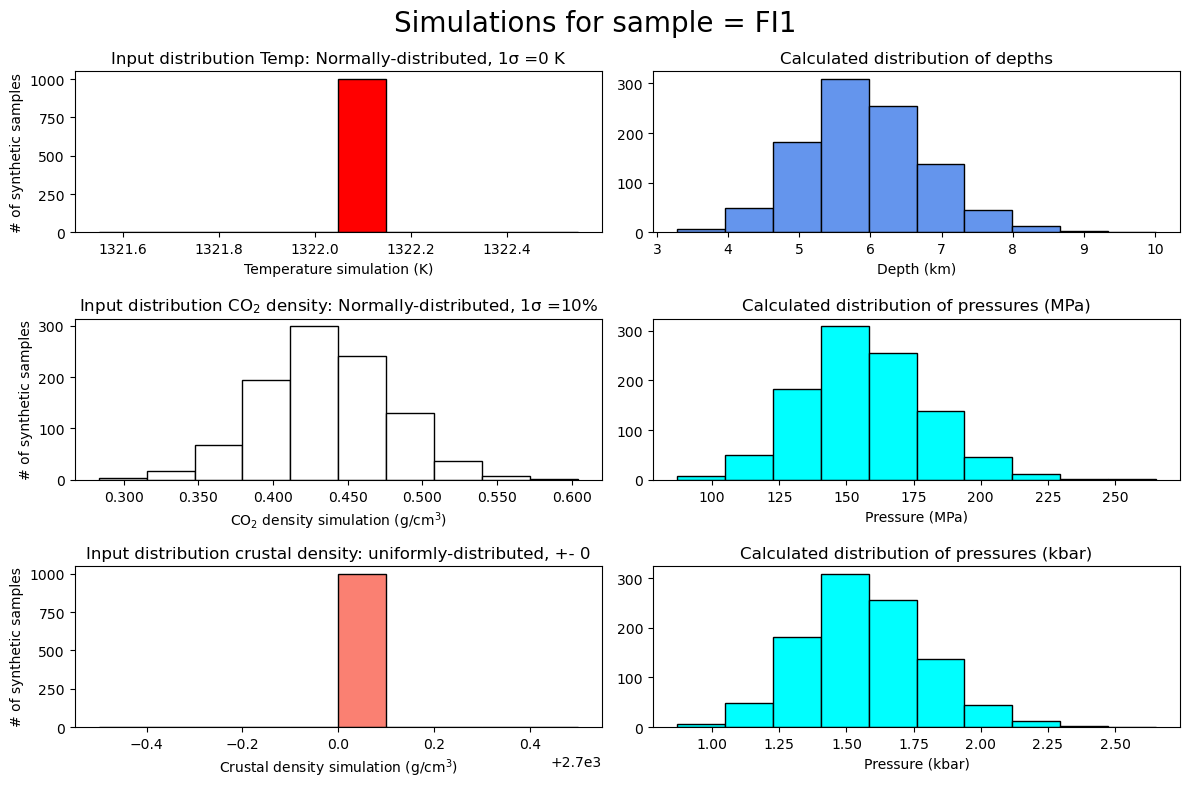

In [5]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.573646,1.569141,0.115530,5.941200,5.924194,0.436175,30,0.02,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.427390,1.420026,0.107701,5.389020,5.361220,0.406620,30,0.02,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.677209,1.671940,0.120339,6.332196,6.312303,0.454332,30,0.02,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.871304,1.870735,0.130410,7.064990,7.062842,0.492355,30,0.02,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.795642,1.792276,0.128721,6.779333,6.766625,0.485977,30,0.02,0.0,1307.970102,0.482227,None,2700,SW96


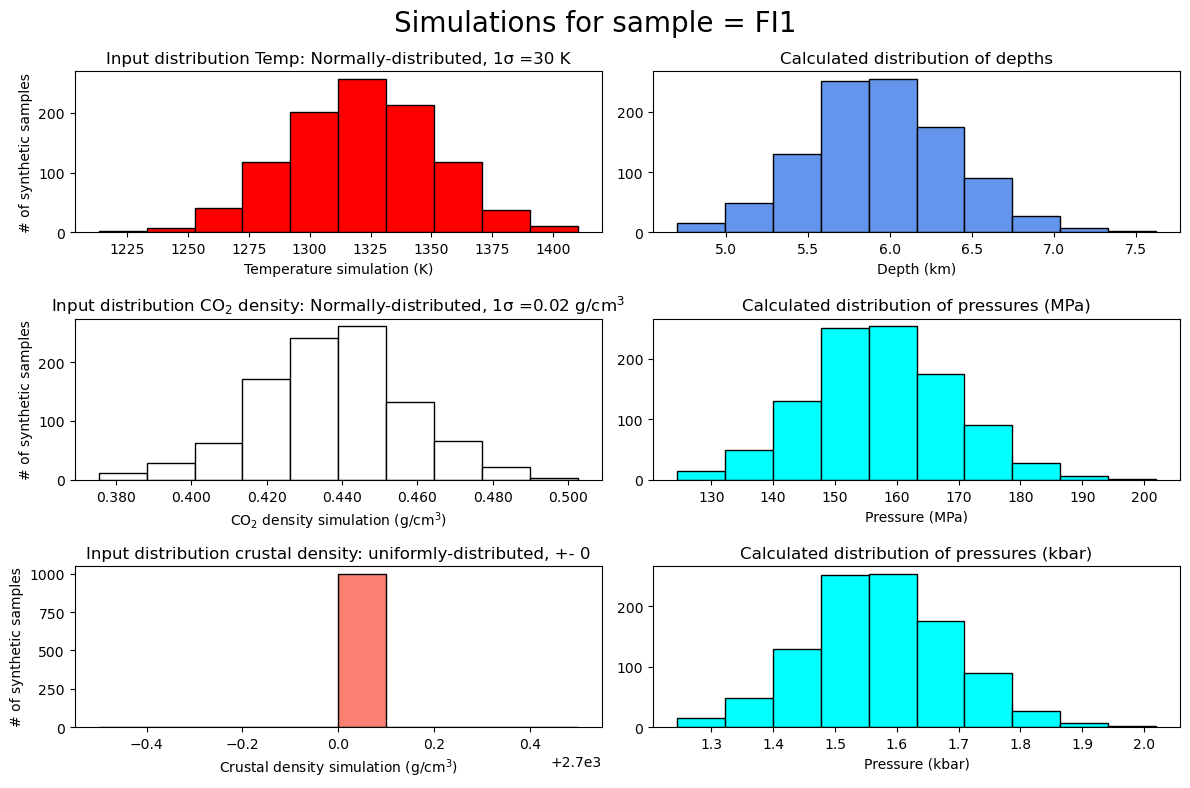

In [6]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO$_2$ and Crustal density
- Here we also add a 5% uncertainty in crustal density.

working on sample number 0
working on sample number 20


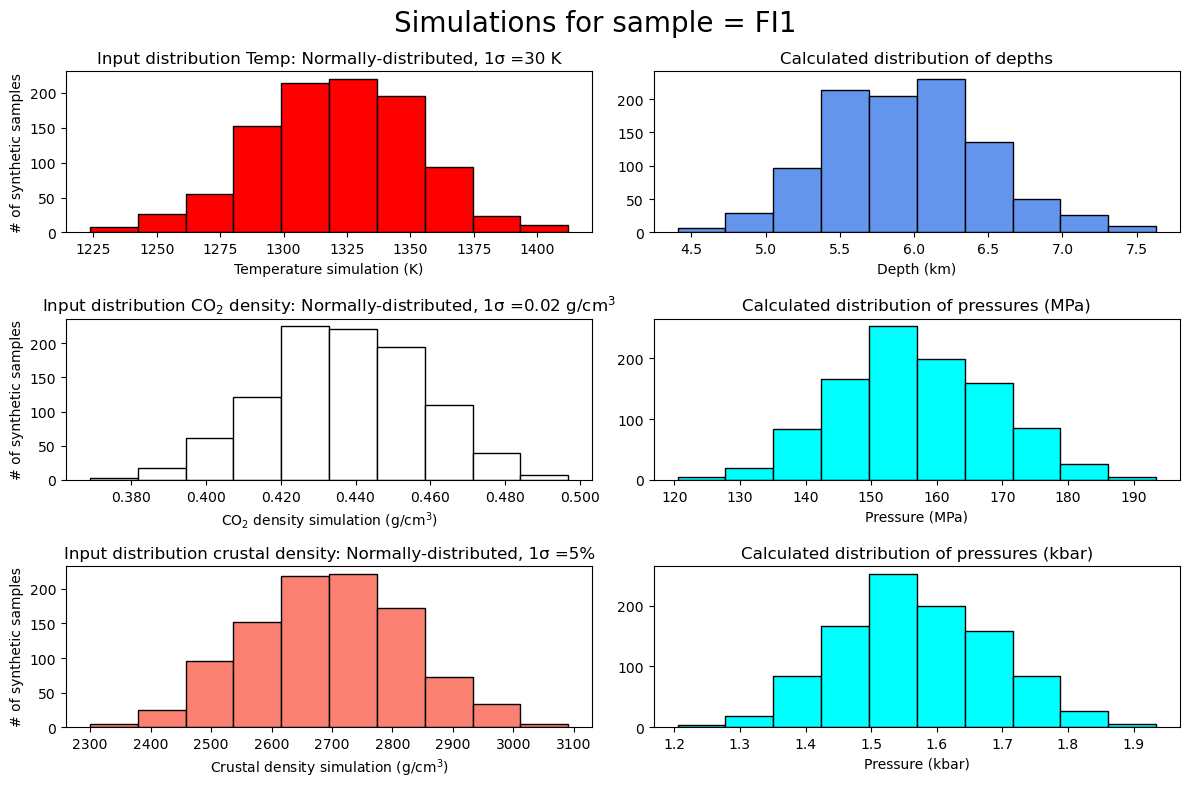

In [7]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CD.head()

fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [8]:
MC_All_rho_T_CD.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,FI1,1.667134,166.713379,6.421068,2646.635728,None,1360.201792,0.445238
1,FI1,1.672582,167.258183,6.056366,2815.180546,None,1314.617204,0.457980
2,FI1,1.610614,161.061440,5.812830,2824.457101,None,1343.989181,0.439148
3,FI1,1.535640,153.563962,5.874978,2664.489924,None,1306.309771,0.434839
4,FI1,1.562893,156.289289,5.878266,2710.260345,None,1306.113157,0.440054


In [9]:
MC_Av_rho_T_CD

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.569588,1.562422,0.117139,5.948227,5.933282,0.526546,30,0.02,135.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.427395,1.423275,0.105011,5.403951,5.385184,0.484346,30,0.02,135.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.681418,1.676435,0.120381,6.360136,6.329826,0.550903,30,0.02,135.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.875464,1.866851,0.132818,7.078769,7.067435,0.610202,30,0.02,135.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.798783,1.794010,0.126522,6.815348,6.771179,0.595868,30,0.02,135.0,1307.970102,0.482227,None,2700,SW96
5,FI9,0.490442,6.954312,1.841989,1.842675,1.833892,0.128516,6.976678,6.963801,0.596560,30,0.02,135.0,1303.661132,0.490442,None,2700,SW96
6,FI11,0.453781,6.207481,1.644175,1.647020,1.647394,0.118889,6.236175,6.204599,0.554872,30,0.02,135.0,1311.100560,0.453781,None,2700,SW96
7,FI13,0.491932,6.895131,1.826313,1.824710,1.816836,0.129689,6.909282,6.882672,0.614808,30,0.02,135.0,1288.892022,0.491932,None,2700,SW96
8,FI15,0.444918,5.985014,1.585251,1.586215,1.582454,0.115943,5.993401,5.964370,0.534492,30,0.02,135.0,1303.569940,0.444918,None,2700,SW96
9,FI17,0.496043,6.929894,1.835521,1.834893,1.828665,0.128866,6.958119,6.938248,0.602546,30,0.02,135.0,1279.968166,0.496043,None,2700,SW96


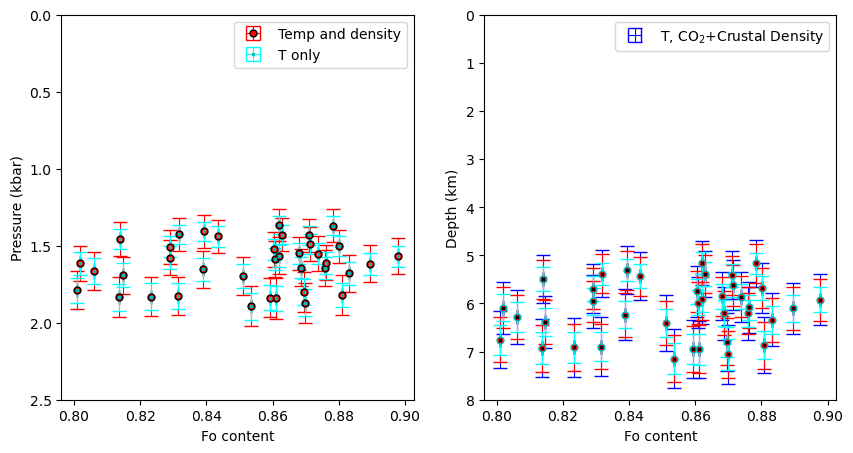

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T_CD['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T_CD['std_dev_MC_D_km'],
             fmt='o', ecolor='b', elinewidth=0.8, mfc='b', ms=0, mec='b', capsize=5,
            label='T, CO$_2$+Crustal Density')
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_P_kbar'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=5,
             label='Temp and density')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_D_km'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='c', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='c', capsize=5,
            label='T only')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax1.legend()
ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()